# Kolmogorov-Smirnov-Test

The Kolmogorov-Smirnov-test can be used to test whether two samples originate from the same, continuous distribution. It is frequently used as a pre-test for checking whether a sample originates from a gaussian distribution. 

$$H_{0}: F_{X}(x) = F_{0}(x)$$

$$H_{0}: F_{X}(x) \neq F_{0}(x)$$

<div class="alert alert-info"><b>Careful:</b> A significance in the ks-test concludes a deviation from the normal distribution. It is not possible to conclude that the data is normal distributed from a ks-test result.</div>

## The function <tt>scipy.stats.kstest()</tt>

    scipy.stats.kstest(x, y)

<tt>x</tt> and <tt>y</tt> are expected to be numpy arrays. By default, a two-sided test is computed.

### Example Mice

The following data set contains speed data of two mice groups:

In [1]:
import pandas as pd
mice = pd.read_csv('data/mice.csv', sep="\t")
mice

,health,speed
0,healthy,13.80
1,healthy,8.50
2,healthy,9.80
3,healthy,7.90
4,healthy,13.45
5,healthy,13.30
6,healthy,7.80
7,healthy,11.40
8,healthy,7.60
9,healthy,9.00


This is data from an experiment with two groups. Typically, we need to assess for both groups whether the data deviates significantly from a normal distribution, i.e. we need to subset the data.

In [2]:
healthy_speed = mice[mice['health'] == "healthy"]['speed']
sick_speed = mice[mice['health'] == "sick"]['speed']

Now, we will first look at the sample from healthy mice:

In [3]:
import scipy
import scipy.stats
import numpy as np

# create a normal distribution that fits to the data
np.random.seed(28041990) # makeing sure that we draw the same points each time we repeat
ref = np.random.normal(healthy_speed.mean(), healthy_speed.std(), 1000000) # play with how the p-value changes if we draw fewer points...

scipy.stats.kstest(healthy_speed, cdf = ref)

KstestResult(statistic=0.17178445454545455, pvalue=0.8484211657485455)

The p-value is greater than 0.05. Despite the here unknown $\beta{}$-error, we will assume that our sample originates from a normal distribution.

Now, we want to know whether the data of the healthy mice group originates from a normal distribution: 

In [4]:
ref = np.random.normal(sick_speed.mean(), sick_speed.std(), 1000000) # play with how the p-value changes if we draw fewer points...

scipy.stats.kstest(sick_speed, cdf = ref)

KstestResult(statistic=0.16380363636363637, pvalue=0.8842107692459071)

Also here, we cannot reject the H$_{0}$ hypothesis.

## Put in Context with Boxplot

<AxesSubplot:title={'center':'speed'}, xlabel='health'>

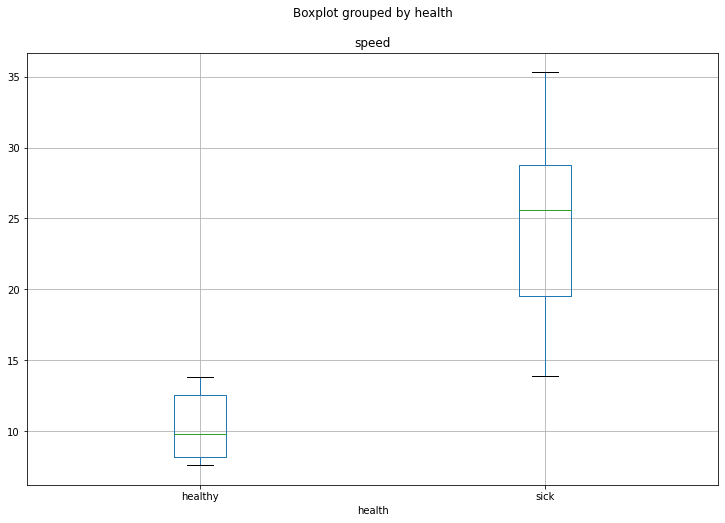

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
mice.boxplot(column=['speed'], by='health', ax=ax)

Visual inspection of the data confirms that there are no solid reasons to believe that these samples are not from a gaussian distribution.

<div class="alert alert-info"><b>Careful:</b> There exists another F-Test called ANOVA which takes advantage of the same distribution obtaining another result. ANOVA checks for differences in two or more samples by analysis of variances.</div>
